<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#What-is-an-autoencoder?" data-toc-modified-id="What-is-an-autoencoder?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is an autoencoder?</a></span></li><li><span><a href="#What-is-an-LSTM-Autoencoder?" data-toc-modified-id="What-is-an-LSTM-Autoencoder?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>What is an LSTM Autoencoder?</a></span></li><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Modelling-part" data-toc-modified-id="Modelling-part-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling part</a></span><ul class="toc-item"><li><span><a href="#Reconstruction-LSTM-Autoencoder" data-toc-modified-id="Reconstruction-LSTM-Autoencoder-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Reconstruction LSTM Autoencoder</a></span></li><li><span><a href="#Prediction-LSTM-Autoencoder" data-toc-modified-id="Prediction-LSTM-Autoencoder-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Prediction LSTM Autoencoder</a></span></li><li><span><a href="#Composite-LSTM-Autoencoder" data-toc-modified-id="Composite-LSTM-Autoencoder-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Composite LSTM Autoencoder</a></span></li><li><span><a href="#Keep-standalone-LSTM-encoder" data-toc-modified-id="Keep-standalone-LSTM-encoder-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Keep standalone LSTM encoder</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** LSTM Autoencoder

</font>
</div>

# What is an autoencoder?
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- An **autoencoder** is made of two parts: an encoder and a decoder.
- Autoencoders are trained to reproduce the input, so it’s kind of like learning a compression algorithm for that specific dataset. 
- **The interesting is that** they are designed to be unable to learn to copy perfectly. Usually they are restricted in ways that allow them to copy only approximately, and to copy only input that resembles the training data. 
- Because the model is forced to prioritise which aspects of the input should be copied, it often learns useful properties of the data. 
- Further, they do it in a totally **unsupervised** manner.

</font>
</div>

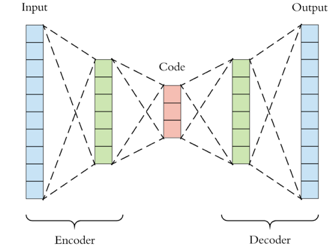

# What is an LSTM Autoencoder?
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- **LSTM** stands for Long-Short-Time Memory.
- An **LSTM autoencoder** is an achitecture that implements an autoencoder for sequence data such as time series.
- How it is used in practice?
    - For a given dataset of sequences, an encoder-decoder LSTM is configured to read the input sequence, encode it, decode it, and **recreate** it.
    - Once the model achieves a desired level of performance recreating the sequence, the decoder part of the model **may be removed**, leaving just the encoder model. This model can then be used to encode input sequences to a fixed-length vector.
    
</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [3]:
import numpy as np
from keras.models import Model
from keras.layers import Input
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
# To be avle to use plot model you have to install pydot
# pip install pydot
from keras.utils.vis_utils import plot_model

# Modelling part
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- We are going to model three different architecture:
    - An LSTM Autoencoder that concentrates on the **reconstruction** of the inputs only.
    - An LSTM Autoencoder that concentrates on the **prediction** of the next step.
    - An LSTM Autoencoder that concentrates on the **composite encoder**, one for reconstruction and one for prediction.
    - Keep standalone LSTM encoder

</font>
</div>

## Reconstruction LSTM Autoencoder
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- An LSTM Autoencoder that concentrates on the **reconstruction** of the inputs only.
- We will use a dataset of one sample of nine time steps and one feature. We can start-off by defining the sequence and reshaping it into the preferred shape of `[samples, timesteps, features]`.
- We can define the encoder-decoder LSTM architecture that expects input sequences with nine time steps and one feature and outputs a sequence with **exactly the same shape**.
    
</font>
</div>

In [3]:
# Define input sequence
sequence = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# Reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))

In [4]:
# Build the model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in, 1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))

In [5]:
# Compile model
model.compile(optimizer='adam', loss='mse')
# Fit model
model.fit(sequence, sequence, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 22s 22s/step - loss: 0.3190
Epoch 2/300
1/1 [==============================] - 0s 13ms/step - loss: 0.2987
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 0.2800
Epoch 4/300
1/1 [==============================] - 0s 14ms/step - loss: 0.2628
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 0.2470
Epoch 6/300
1/1 [==============================] - 0s 13ms/step - loss: 0.2314
Epoch 7/300
1/1 [==============================] - 0s 13ms/step - loss: 0.2152
Epoch 8/300
1/1 [==============================] - 0s 14ms/step - loss: 0.1981
Epoch 9/300
1/1 [==============================] - 0s 13ms/step - loss: 0.1802
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 0.1616
Epoch 11/300
1/1 [==============================] - 0s 12ms/step - loss: 0.1424
Epoch 12/300
1/1 [==============================] - 0s 10ms/step - loss: 0.1220
Epoch 13/300
1/1 [==============================]

1/1 [==============================] - 0s 9ms/step - loss: 2.5857e-06
Epoch 199/300
1/1 [==============================] - 0s 10ms/step - loss: 2.5808e-06
Epoch 200/300
1/1 [==============================] - 0s 10ms/step - loss: 2.5761e-06
Epoch 201/300
1/1 [==============================] - 0s 10ms/step - loss: 2.5713e-06
Epoch 202/300
1/1 [==============================] - 0s 10ms/step - loss: 2.5664e-06
Epoch 203/300
1/1 [==============================] - 0s 12ms/step - loss: 2.5614e-06
Epoch 204/300
1/1 [==============================] - 0s 10ms/step - loss: 2.5563e-06
Epoch 205/300
1/1 [==============================] - 0s 11ms/step - loss: 2.5512e-06
Epoch 206/300
1/1 [==============================] - 0s 10ms/step - loss: 2.5459e-06
Epoch 207/300
1/1 [==============================] - 0s 9ms/step - loss: 2.5406e-06
Epoch 208/300
1/1 [==============================] - 0s 11ms/step - loss: 2.5351e-06
Epoch 209/300
1/1 [==============================] - 0s 11ms/step - loss: 2.5297e

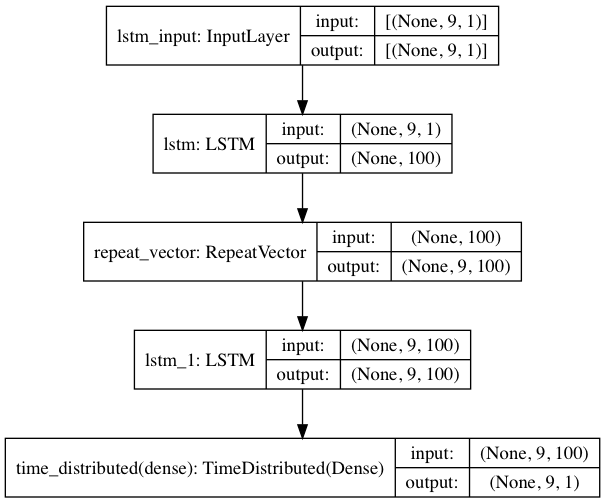

In [6]:
plot_model(model, show_shapes=True)

In [16]:
yhat = model.predict(sequence, verbose=0)

for i, value in enumerate(zip([i[0] for i in sequence[0]], yhat[0,:,0])):
    print("Original & Reconstructed: ", value)

Original & Reconstructed:  (0.1, 0.10325792)
Original & Reconstructed:  (0.2, 0.19894113)
Original & Reconstructed:  (0.3, 0.2982405)
Original & Reconstructed:  (0.4, 0.39936426)
Original & Reconstructed:  (0.5, 0.5009487)
Original & Reconstructed:  (0.6, 0.6012421)
Original & Reconstructed:  (0.7, 0.70019287)
Original & Reconstructed:  (0.8, 0.79931617)
Original & Reconstructed:  (0.9, 0.8998881)


## Prediction LSTM Autoencoder
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- An LSTM Autoencoder that concentrates on the **prediction** of the next step.
- We are going to feed the model with this `[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]` and we expected an output like this `[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]`. Thus, with a step difference of one.
- This means that the model will expect each input sequence to have **nine** time steps and the output sequence to have **eight** time steps.

</font>
</div>

In [19]:
# Define input sequence
seq_in = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# Reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# Prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1

In [20]:
# Define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in, 1)))
model.add(RepeatVector(n_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

In [26]:
# Compile model
model.compile(optimizer='adam', loss='mse')
# Fit model
model.fit(seq_in, seq_out, epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 4s 4s/step - loss: 5.5993e-06
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 1.3932e-05
Epoch 3/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0033
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 1.6905e-05
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 8/500
1/1 [==============================] - 0s 13ms/step - loss: 1.0764e-04
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 3.0999e-04
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 11/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 12/500
1/1 [==============================] - 0s 11ms/step - loss: 3.4615e-04
Epoch 13/500
1/1 [=========

1/1 [==============================] - 0s 10ms/step - loss: 2.8271e-06
Epoch 196/500
1/1 [==============================] - 0s 10ms/step - loss: 2.8156e-06
Epoch 197/500
1/1 [==============================] - 0s 9ms/step - loss: 2.8041e-06
Epoch 198/500
1/1 [==============================] - 0s 10ms/step - loss: 2.7926e-06
Epoch 199/500
1/1 [==============================] - 0s 10ms/step - loss: 2.7813e-06
Epoch 200/500
1/1 [==============================] - 0s 9ms/step - loss: 2.7698e-06
Epoch 201/500
1/1 [==============================] - 0s 11ms/step - loss: 2.7583e-06
Epoch 202/500
1/1 [==============================] - 0s 11ms/step - loss: 2.7469e-06
Epoch 203/500
1/1 [==============================] - 0s 10ms/step - loss: 2.7355e-06
Epoch 204/500
1/1 [==============================] - 0s 10ms/step - loss: 2.7241e-06
Epoch 205/500
1/1 [==============================] - 0s 9ms/step - loss: 2.7128e-06
Epoch 206/500
1/1 [==============================] - 0s 11ms/step - loss: 2.7014e-

1/1 [==============================] - 0s 10ms/step - loss: 1.7979e-06
Epoch 293/500
1/1 [==============================] - 0s 9ms/step - loss: 1.7885e-06
Epoch 294/500
1/1 [==============================] - 0s 9ms/step - loss: 1.7791e-06
Epoch 295/500
1/1 [==============================] - 0s 9ms/step - loss: 1.7698e-06
Epoch 296/500
1/1 [==============================] - 0s 9ms/step - loss: 1.7605e-06
Epoch 297/500
1/1 [==============================] - 0s 9ms/step - loss: 1.7512e-06
Epoch 298/500
1/1 [==============================] - 0s 10ms/step - loss: 1.7419e-06
Epoch 299/500
1/1 [==============================] - 0s 10ms/step - loss: 1.7327e-06
Epoch 300/500
1/1 [==============================] - 0s 9ms/step - loss: 1.7236e-06
Epoch 301/500
1/1 [==============================] - 0s 9ms/step - loss: 1.7145e-06
Epoch 302/500
1/1 [==============================] - 0s 11ms/step - loss: 1.7052e-06
Epoch 303/500
1/1 [==============================] - 0s 9ms/step - loss: 1.6962e-06
Ep

1/1 [==============================] - 0s 9ms/step - loss: 1.0368e-06
Epoch 390/500
1/1 [==============================] - 0s 9ms/step - loss: 1.0306e-06
Epoch 391/500
1/1 [==============================] - 0s 9ms/step - loss: 1.0244e-06
Epoch 392/500
1/1 [==============================] - 0s 9ms/step - loss: 1.0182e-06
Epoch 393/500
1/1 [==============================] - 0s 10ms/step - loss: 1.0121e-06
Epoch 394/500
1/1 [==============================] - 0s 9ms/step - loss: 1.0060e-06
Epoch 395/500
1/1 [==============================] - 0s 9ms/step - loss: 9.9997e-07
Epoch 396/500
1/1 [==============================] - 0s 9ms/step - loss: 9.9392e-07
Epoch 397/500
1/1 [==============================] - 0s 9ms/step - loss: 9.8795e-07
Epoch 398/500
1/1 [==============================] - 0s 9ms/step - loss: 9.8201e-07
Epoch 399/500
1/1 [==============================] - 0s 9ms/step - loss: 9.7600e-07
Epoch 400/500
1/1 [==============================] - 0s 9ms/step - loss: 9.7012e-07
Epoch

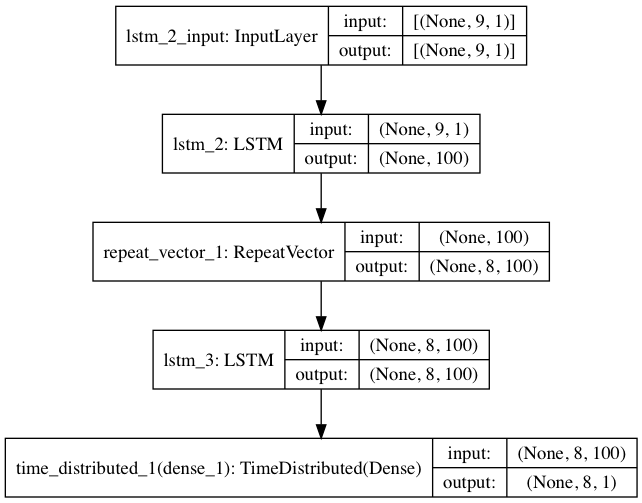

In [23]:
plot_model(model, show_shapes=True)

In [27]:
yhat = model.predict(sequence, verbose=0)

for i, value in enumerate(zip([i[0] for i in sequence[0]], yhat[0,:,0])):
    print("Original & Next: ", value)

Original & Next:  (0.1, 0.19912353)
Original & Next:  (0.2, 0.30038738)
Original & Next:  (0.3, 0.40081784)
Original & Next:  (0.4, 0.5005805)
Original & Next:  (0.5, 0.5998297)
Original & Next:  (0.6, 0.6991166)
Original & Next:  (0.7, 0.79918796)
Original & Next:  (0.8, 0.9008962)


## Composite LSTM Autoencoder
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- Finally, we can create a composite LSTM Autoencoder that has a single encoder and two decoders:
    - one for reconstruction and 
    - one for prediction. 

</font>
</div>

In [30]:
# Define the encoder
visible = Input(shape=(n_in,1))
encoder = LSTM(100, activation='relu')(visible)

In [31]:
# Define reconstruct decoder
decoder1 = RepeatVector(n_in)(encoder)
decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)

In [32]:
# Define predict decoder
decoder2 = RepeatVector(n_out)(encoder)
decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(1))(decoder2)

In [36]:
# Tie it together
model = Model(inputs=visible, outputs=[decoder1, decoder2])

In [41]:
# Compile the model
model.compile(optimizer='adam', loss='mse')
# Fit model
model.fit(seq_in, [seq_in,seq_out], epochs=500, verbose=0)

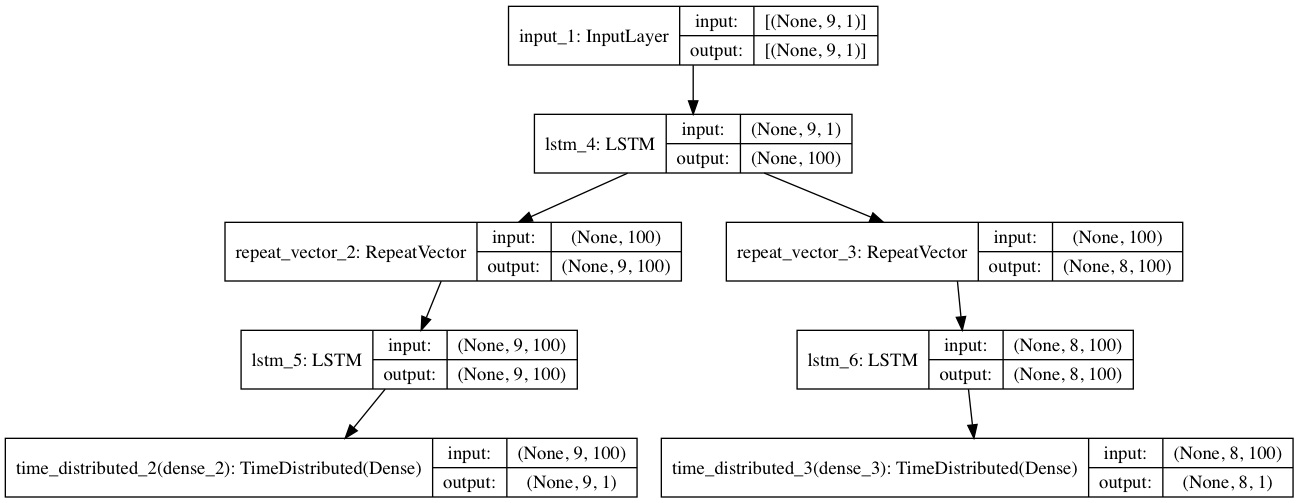

In [38]:
plot_model(model, show_shapes=True)

In [45]:
# Predict
yhat = model.predict(seq_in, verbose=0)

In [46]:
# The first entry is the reconstructed vector
for i, value in enumerate(zip([i[0] for i in sequence[0]], yhat[0][0,:,0])):
    print("Original & REconstructed: ", value)

Original & REconstructed:  (0.1, 0.10045321)
Original & REconstructed:  (0.2, 0.19928198)
Original & REconstructed:  (0.3, 0.29997927)
Original & REconstructed:  (0.4, 0.40042245)
Original & REconstructed:  (0.5, 0.50034595)
Original & REconstructed:  (0.6, 0.59998703)
Original & REconstructed:  (0.7, 0.69964874)
Original & REconstructed:  (0.8, 0.7995999)
Original & REconstructed:  (0.9, 0.9003771)


In [47]:
# The second entry is the next prediction
for i, value in enumerate(zip([i[0] for i in sequence[0]], yhat[1][0,:,0])):
    print("Original & Next: ", value)

Original & Next:  (0.1, 0.19957235)
Original & Next:  (0.2, 0.30056483)
Original & Next:  (0.3, 0.3996964)
Original & Next:  (0.4, 0.49987105)
Original & Next:  (0.5, 0.60011023)
Original & Next:  (0.6, 0.7001252)
Original & Next:  (0.7, 0.79998)
Original & Next:  (0.8, 0.8999583)


## Keep standalone LSTM encoder
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- Unce the autoencoder has been fit, the decoder can be **removed** and the encoder can be kept as a standalone model. 
- The encoder **can be used** to transform input sequences to a fixed length encoded vector.
- We can do this by creating a new model that has the same inputs as our original model, and outputs directly from the end of encoder model, before the RepeatVector layer.
- We demonstrate the encoder by predicting the sequence and getting back the 100 element output of the encoder.

</font>
</div>

In [4]:
# define input sequence
sequence = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in, 1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)
# connect the encoder LSTM as the output layer
model = Model(inputs=model.inputs, outputs=model.layers[0].output)
plot_model(model, show_shapes=True, to_file='lstm_encoder.png')
# get the feature vector for the input sequence
yhat = model.predict(sequence)
print(yhat.shape)
print(yhat)

(1, 100)
[[0.         0.10377906 0.         0.         0.         0.02379979
  0.         0.03891791 0.         0.         0.         0.
  0.01672795 0.         0.         0.         0.         0.0166135
  0.05185308 0.         0.         0.         0.         0.04112059
  0.         0.09293946 0.11006746 0.         0.         0.
  0.         0.02633591 0.         0.         0.04489053 0.05277789
  0.04741173 0.08477285 0.         0.         0.         0.09013515
  0.09774194 0.         0.         0.06232381 0.05427705 0.03046571
  0.         0.         0.01630108 0.         0.08121877 0.
  0.         0.         0.         0.         0.         0.
  0.06472712 0.01661564 0.         0.03468118 0.03434465 0.04422839
  0.09437373 0.         0.07135686 0.         0.10433464 0.1264821
  0.         0.05803259 0.04690474 0.         0.12093221 0.
  0.         0.         0.         0.         0.         0.02865228
  0.11491029 0.         0.         0.         0.         0.08234629
  0.08455301 

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/lstm-autoencoders/
- [Encoder](https://towardsdatascience.com/understanding-latent-space-in-machine-learning-de5a7c687d8d)
- [Keras functional API](https://machinelearningmastery.com/keras-functional-api-deep-learning/)
    
</font>
</div>